<a href="https://colab.research.google.com/github/pedrohortencio/digit-recognizer-kaggle/blob/master/Digit_Recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Pesquisa sobre o dataset MNIST](http://yann.lecun.com/exdb/mnist/)


[Competição do Kaggle](https://www.kaggle.com/c/digit-recognizer)

##Importação de Módulos e Transferência de Arquivos

###Importação de pacotes

In [6]:
import numpy as np                  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

sns.set_theme()

Criação e validação do token da API do Kaggle, para que os pacotes possam ser baixados. É necessário que o arquivo kaggle.jason esteja na pasta /content do Google Colab. As duas células de código abaixo devem ser alteradas a depender do sistema onde o código está sendo executado. Caso os arquivos estejam salvos localmente, não é necessário que elas sejam executadas.

In [7]:
!pip install -q kaggle

In [8]:
#mudança do diretório onde fica salvo o kaggle.jason
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


###Download dos pacotes

In [9]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/9.16M [00:00<?, ?B/s]
100% 9.16M/9.16M [00:00<00:00, 84.1MB/s]
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 100MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 78.0MB/s]


##Criação dos DataFrames

In [10]:
# importação dos dataframes da pasta /content, onde estão os arquivos baixados
df_treino = pd.read_csv('/content/train.csv.zip', compression='zip', 
                        header=0, sep=',', quotechar='"')
df_teste = pd.read_csv('/content/test.csv.zip', compression='zip', 
                       header=0, sep=',', quotechar='"')

In [11]:
df_treino.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_teste.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Formato dos arquivos
print(df_treino.shape)
print(df_teste.shape)

(42000, 785)
(28000, 784)


In [14]:
# Criando um ndarray de labels que será usada para avaliação
y = df_treino['label'].to_numpy()

# Retirando a coluna de labels do DataFrame
df_treino = df_treino.drop('label', axis=1)

In [15]:
y

array([1, 0, 1, ..., 7, 6, 9])

## Visualização do dataset

In [16]:
# Transformando o dataset com informações das imagens em um ndarray, para ser mais fácil printar as imagens
X_visu = df_treino.to_numpy()
print(X_visu.shape)
X_visu

(42000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

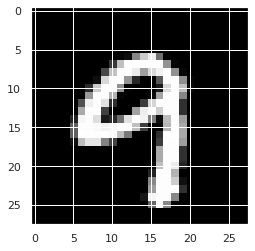

In [17]:
# Cada um dos 42000 arrays possui uma dimensão, de 784 posições.
    # para ser transformado em imagem, precisa ser convertido em formato 2D.
    # a conversão é feita usando a função .reshape(x, y)
plt.imshow(X_visu[9238].reshape(28,28), cmap='gray')

Visualização em Grid

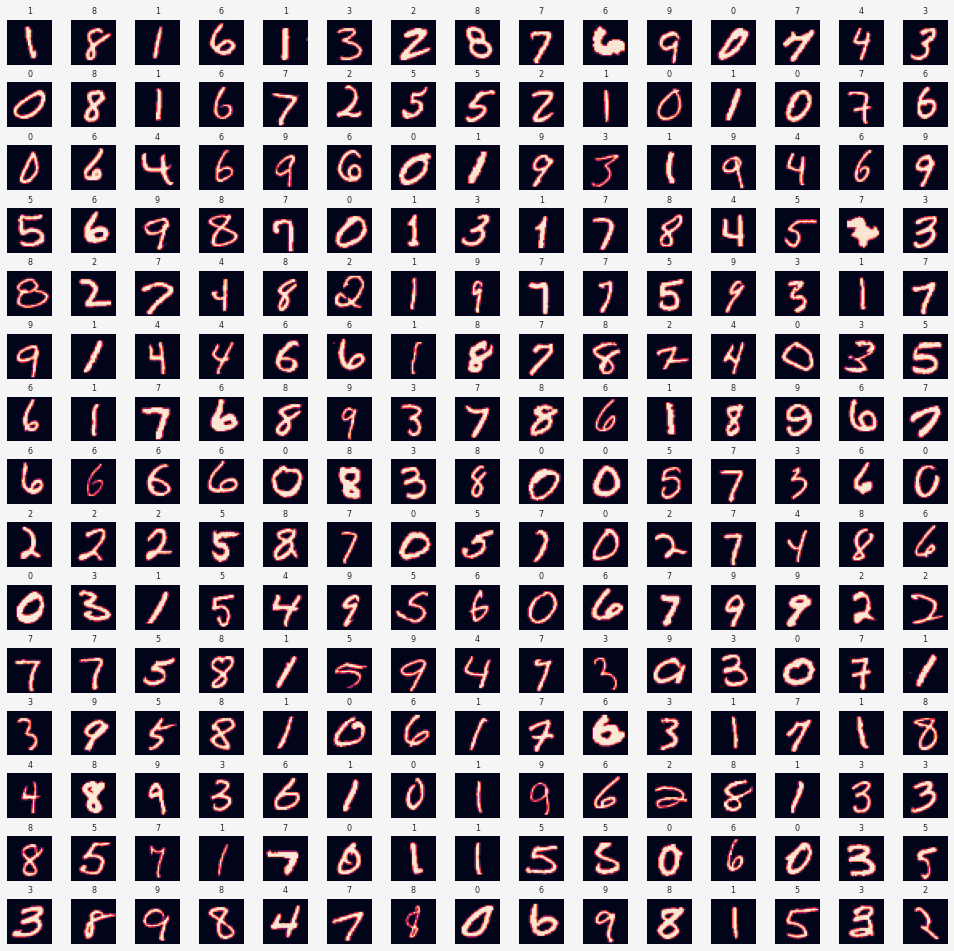

In [18]:
# Definindo o tamanho do grid (altura e largura)
W_grid = 15
L_grid = 15

# Criando os objetos figure e axes (eixos), que são retornados pela função subplot
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

# Mudando a cor do background
fig.patch.set_facecolor('whitesmoke')

# Achatando a matrix 15 x 15 em um array de 255 posições
axes = axes.ravel()

n_training = len(X_visu) # Retorna o tamanho do ndarray X_visu (qtd de imagens)

# Selecionando um número aleatório entre 0 e n_training
for i in np.arange(0, W_grid * L_grid): # Cria variáveis igualmente espaçadas 

    # Selecionando outro número aleatório
    index = np.random.randint(0, n_training)
    # Lendo e exibindo a imagem no índice escolhido aleatoriamente    
    axes[i].imshow(X_visu[index].reshape(28,28))
    axes[i].set_title(y[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

##Criando um scaler para normalizar os dados

In [19]:
X = df_treino.to_numpy()
X_test = df_teste.to_numpy()

In [20]:
print(X.shape)
print(X_test.shape)

(42000, 784)
(28000, 784)


In [21]:
X = X.reshape(42000, 28, 28, 1)
X = X.astype('float32') / 255

X_test = X_test.reshape((28000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [22]:
X.shape

(42000, 28, 28, 1)

##Criação dos dados de treino e validação (dados de teste serão o dataset separado).

In [23]:
(X_train, X_VT,
 y_train, y_VT) = train_test_split(X, y, test_size=0.3, random_state=0)

(X_validation, X_t,
  y_validation, y_t) = train_test_split(X_VT, y_VT, test_size=0.5, random_state=0)

# Criados:
    # X_train, y_train
    # X_validation, y_validation
    # X_t, y_t

In [24]:
print('Tamanho dos conjuntos de dados')
print('Conjunto de treino:', X_train.shape)
print('Labels do conjunto de treino: ', y_train.shape)
print('Conjunto de validação: ', X_validation.shape)
print('Labels do conjunto de validação: ', y_validation.shape)
print('Conjunto de teste: ', X_t.shape)
print('Labels do conjunto de teste: ', y_t.shape)

Tamanho dos conjuntos de dados
Conjunto de treino: (29400, 28, 28, 1)
Labels do conjunto de treino:  (29400,)
Conjunto de validação:  (6300, 28, 28, 1)
Labels do conjunto de validação:  (6300,)
Conjunto de teste:  (6300, 28, 28, 1)
Labels do conjunto de teste:  (6300,)


## Criação da Rede Neural Convolucional (CNN)

In [138]:
# Criando o modelo
def criar_modelo():
    model = tf.keras.models.Sequential([
            
            tf.keras.layers.Conv2D(32, (3,3), activation=keras.layers.LeakyReLU(), input_shape=(28, 28, 1)), 
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3,3), activation=keras.layers.LeakyReLU()),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            tf.keras.layers.Conv2D(64, (3,3), activation=keras.layers.LeakyReLU()),
            
            tf.keras.layers.Flatten(),

            tf.keras.layers.Dense(64, activation=keras.layers.LeakyReLU(), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.5e-5, l2=1e-4)),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(32, activation=keras.layers.LeakyReLU(), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(10, activation='softmax')    
    ])
    return model

In [142]:
# Compilando o modelo
model = criar_modelo()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary() # Dá um resumo do modelo

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_28 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)              

In [132]:
loss_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [143]:
# Treinando o modelo
history = model.fit(X_train, y_train, epochs=100, callbacks=loss_callback, validation_data=(X_validation, y_validation))

Epoch 1/100
919/919 [==============================] - 4s 4ms/step - loss: 1.4079 - accuracy: 0.5687 - val_loss: 0.2949 - val_accuracy: 0.9300
Epoch 2/100
919/919 [==============================] - 3s 4ms/step - loss: 0.3444 - accuracy: 0.9109 - val_loss: 0.2145 - val_accuracy: 0.9519
Epoch 3/100
919/919 [==============================] - 3s 4ms/step - loss: 0.2388 - accuracy: 0.9417 - val_loss: 0.1756 - val_accuracy: 0.9600
Epoch 4/100
919/919 [==============================] - 3s 3ms/step - loss: 0.1925 - accuracy: 0.9559 - val_loss: 0.1490 - val_accuracy: 0.9686
Epoch 5/100
919/919 [==============================] - 3s 3ms/step - loss: 0.1641 - accuracy: 0.9649 - val_loss: 0.1392 - val_accuracy: 0.9727
Epoch 6/100
919/919 [==============================] - 3s 3ms/step - loss: 0.1522 - accuracy: 0.9676 - val_loss: 0.1251 - val_accuracy: 0.9746
Epoch 7/100
919/919 [==============================] - 3s 3ms/step - loss: 0.1421 - accuracy: 0.9726 - val_loss: 0.1284 - val_accuracy: 0.9740

In [144]:
# Avaliando o modelo no dataset de validação 09936
loss = model.evaluate(X_t, y_t)

197/197 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9870


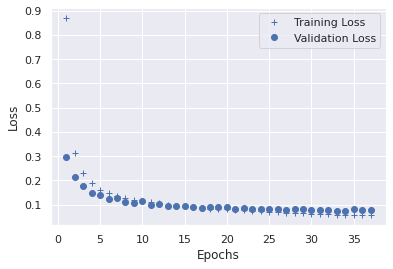

In [145]:
epochs = range(1, 38)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']


# b+ is for "blue cross"
plt.plot(epochs, training_loss, 'b+', label='Training Loss')
# "bo" is for "blue dot"
plt.plot(epochs, validation_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

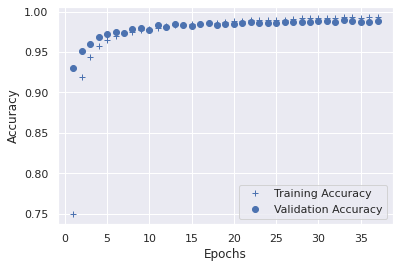

In [146]:
epochs = range(1, 38)
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, training_acc, 'b+', label='Training Accuracy')
# "bo" is for "blue dot"
plt.plot(epochs, validation_acc, 'bo', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Treinando no dataset inteiro

In [154]:
loss_cbk = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [165]:
# Treinando o modelo
modelo_final = criar_modelo()
modelo_final.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo_final.fit(X, y, epochs=40, callbacks=loss_cbk)

Epoch 1/40
1313/1313 [==============================] - 5s 3ms/step - loss: 1.1383 - accuracy: 0.6506
Epoch 2/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2653 - accuracy: 0.9337
Epoch 3/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1923 - accuracy: 0.9559
Epoch 4/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1643 - accuracy: 0.9632
Epoch 5/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1411 - accuracy: 0.9704
Epoch 6/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1287 - accuracy: 0.9735
Epoch 7/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1196 - accuracy: 0.9754
Epoch 8/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1128 - accuracy: 0.9791
Epoch 9/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1055 - accuracy: 0.9805
Epoch 10/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.103

##Realizando a predição no dataset de teste e gerando o arquivo .csv para o Kaggle

In [117]:
X_test.shape

(28000, 28, 28, 1)

In [166]:
# executando o modelo no dataset de teste do Kaggle
result = modelo_final.predict(X_test)

In [167]:
predictions = np.argmax(result, axis = 1)

In [168]:
# Criando um dataframe com as predições
df = pd.DataFrame(predictions)

# Incrementando o índice em 1 para estar no padrão de ID do Kaggle
df.index+=1

In [169]:
print(result.shape)

# Criando o arquivo. Ele será salvo na pasta /content, podendo ser baixado.
filename = 'DigitalPredictions.csv'
df.to_csv(filename, index=True, header=["Label"], index_label=["ImageId"])
print('Saved file: ' + filename)

# Acurácia dada pelo Kaggle = 0.98453

(28000, 10)
Saved file: DigitalPredictions.csv
